In [1]:
import os
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from PIL import Image
import cv2
import cv2.cv as cv
import math
import retinaMethods as rm
from numpy import genfromtxt
import paths_file

In [2]:
path = paths_file.train_orig_path

#Get images names
all_imag = os.listdir(path)

#Sort the files names to be according with the name file
rm.sort_nicely(all_imag) 

In [3]:
print(all_imag.index('179_right.jpeg'))
print(all_imag.index('1350_right.jpeg'))


153
1093


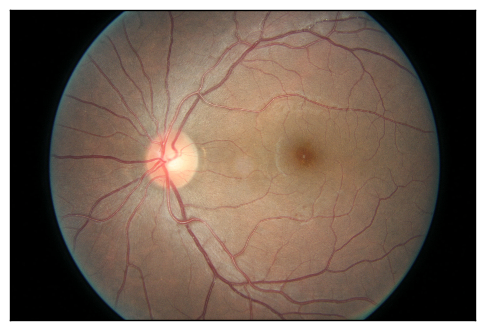

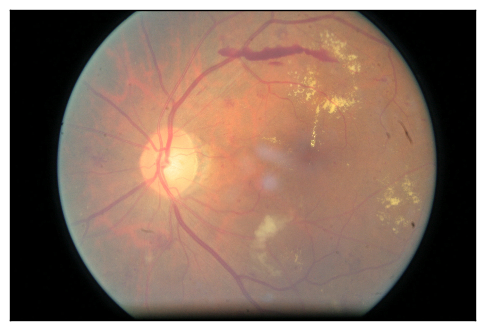

In [4]:
img_rows = 400
img_cols = 512

img_level_0 = im=cv2.imread(os.path.join(path, all_imag[153]))
img_level_0 = img_level_0[:,:,::-1]

# img_level_0 = cv2.resize(img_level_0,(img_cols ,img_rows), interpolation =  cv2.INTER_CUBIC )

img_level_4 = im=cv2.imread(os.path.join(path, all_imag[1093]))  
img_level_4 = img_level_4[:,:,::-1]

# img_level_4 = cv2.resize(img_level_4,(img_cols ,img_rows), interpolation =  cv2.INTER_CUBIC )

plt.imshow(img_level_0)
plt.xticks([]),plt.yticks([])
plt.show()
plt.imshow(img_level_4)
plt.xticks([]),plt.yticks([])
plt.show()

In [5]:
imCahnge = img_level_0

(477, 600, 3)


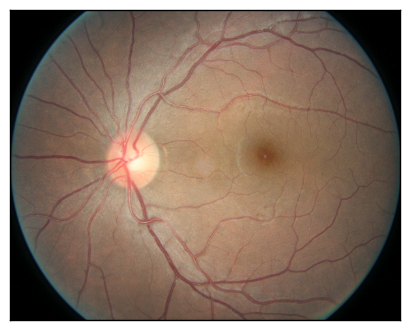

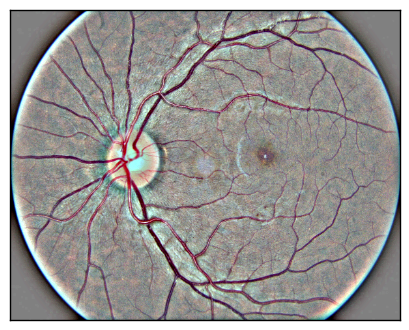

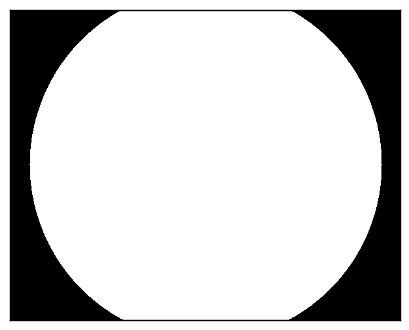

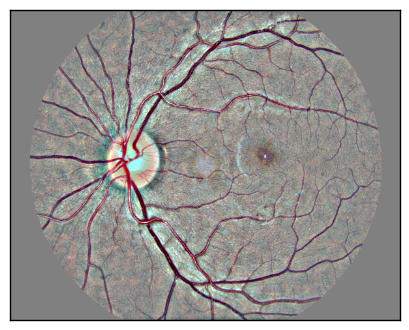

In [6]:
import cv2, glob, numpy
def scaleRadius(img , scale):
    x = img[img.shape[0]/2,:,:].sum(1)
    r = (x>x.mean()/10).sum()/2
    s = scale*1.0/r
    return cv2.resize(img,(0,0), fx=s, fy= s)

scale = 300

a = imCahnge
a = rm.cutRetina(a)
a = scaleRadius(a, scale)
print(a.shape)
plt.imshow(a ) , plt.xticks([]),plt.yticks([]) , plt.show()

#substract local mean color
a = cv2.addWeighted(a , 4, cv2.GaussianBlur(a, (0,0), scale/30), -4,128)

plt.imshow(a ) , plt.xticks([]),plt.yticks([]) , plt.show()


#remove outer 10%

b= np.zeros(a.shape)
cv2.circle(b, (a.shape[1]/2, a.shape[0]/2) , int(scale*0.9), (1,1,1), -1,8,0)

plt.imshow(b ) , plt.xticks([]),plt.yticks([]) , plt.show()


Final = (a*b + 128*(1-b)).astype('uint8')
plt.imshow(Final ) , plt.xticks([]),plt.yticks([]) , plt.show()


#MAKE THE IMAGE A SQUARE ADDING BACKGROUND AT THE MATRIX
def squareImage(img1 , color = [128,128,128] ):

	#Initial conditions
	top = bottom = left = rigth = 0
	h, w , _ = img1.shape
	dif = abs(h-w)

	#Verify in witch senses add the border
	if dif != 0:
	    if h > w:
	        #Needs to add in left-rigth
	        left = dif/2
	        rigth  = dif/2 + (dif % 2) 
	    else:
	        #Needs to add in top-bottom
	        top = dif/2
	        bottom  = dif/2 + (dif % 2)  

	#Make border
	constant= cv2.copyMakeBorder(img1,top,bottom,left,rigth,cv2.BORDER_CONSTANT,value=color)

	return constant

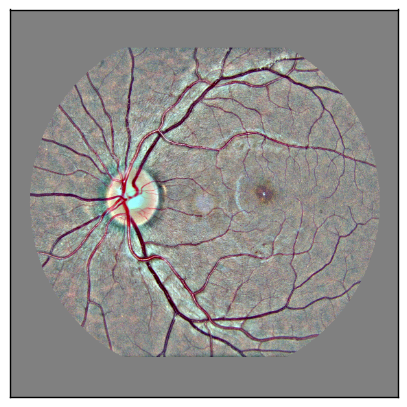

(477, 600, 3)
(600, 600, 3)


In [7]:
plt.rcParams['figure.figsize'] = (5,5)

sqIm = squareImage(Final)
plt.imshow(sqIm) , plt.xticks([]),plt.yticks([])
plt.show()
print(Final.shape)
print(sqIm.shape)

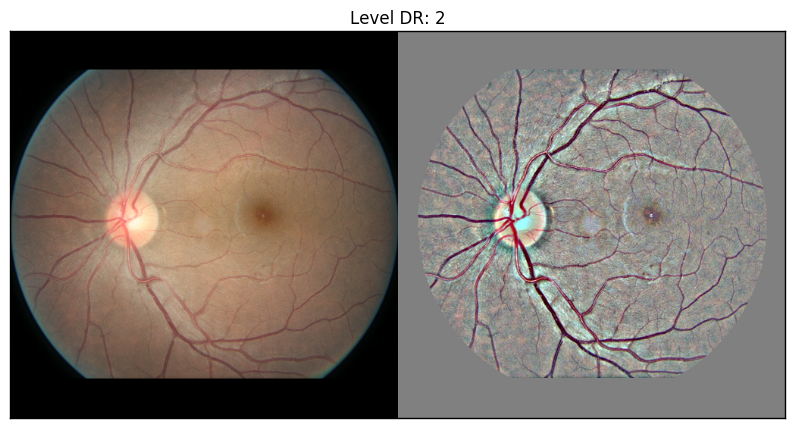

In [8]:
plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger
 
img_rows = img_cols = 512

final2 = cv2.resize(sqIm,(img_cols, img_rows), interpolation =  cv2.INTER_CUBIC)
rez =  cv2.resize(squareImage(rm.cutRetina(imCahnge ), color = [0,0,0]),(img_cols, img_rows), interpolation =  cv2.INTER_CUBIC)
res = np.hstack((rez,final2))
plt.imshow(res)
plt.title("Level DR: 2")
plt.xticks([]),plt.yticks([])
plt.show()

# -----------------------------------------------------------------------------------------------------------


In [9]:
#Random rotation Keras methods
import scipy.ndimage as ndi

def random_rotation(x, rg, row_index=1, col_index=2, channel_index=0,
                    fill_mode='nearest', cval=0.):
    theta = np.pi / 180 * np.random.uniform(-rg, rg)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                [np.sin(theta), np.cos(theta), 0],
                                [0, 0, 1]])

    h, w = x.shape[row_index], x.shape[col_index]
    transform_matrix = transform_matrix_offset_center(rotation_matrix, h, w)
    x = apply_transform(x, transform_matrix, channel_index, fill_mode, cval)
    return x

def transform_matrix_offset_center(matrix, x, y):
    o_x = float(x) / 2 + 0.5
    o_y = float(y) / 2 + 0.5
    offset_matrix = np.array([[1, 0, o_x], [0, 1, o_y], [0, 0, 1]])
    reset_matrix = np.array([[1, 0, -o_x], [0, 1, -o_y], [0, 0, 1]])
    transform_matrix = np.dot(np.dot(offset_matrix, matrix), reset_matrix)
    return transform_matrix

def apply_transform(x, transform_matrix, channel_index=0, fill_mode='nearest', cval=0.):
    x = np.rollaxis(x, channel_index, 0)
    final_affine_matrix = transform_matrix[:2, :2]
    final_offset = transform_matrix[:2, 2]
    channel_images = [ndi.interpolation.affine_transform(x_channel, final_affine_matrix,
                      final_offset, order=0, mode=fill_mode, cval=cval) for x_channel in x]
    x = np.stack(channel_images, axis=0)
    x = np.rollaxis(x, 0, channel_index+1)
    return x
#-------------------------------------------------------------


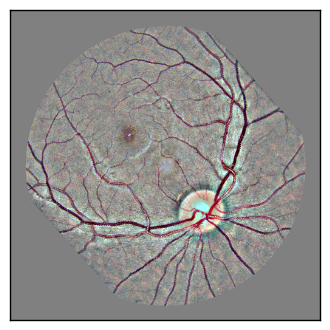

(512, 512, 3)

In [43]:
plt.rcParams['figure.figsize'] = (4,4,)

x = random_rotation(final2, 360 ,fill_mode = 'constant', cval=128 , col_index=1, channel_index = 2 , row_index=0)

plt.imshow(x), plt.xticks([]),plt.yticks([])
plt.show()
x.shape

In [11]:
path = paths_file.train_processed_path
all_imag = [f for f in os.listdir(path) if f.startswith('i')]
all_label = [f for f in os.listdir(path) if f.startswith('l')]

#Sort the files names to be according with the labeling file
rm.sort_nicely(all_imag) 
rm.sort_nicely(all_label) 

In [12]:
X_train = np.load(os.path.join(path, all_imag[0]))

(3, 512, 512)


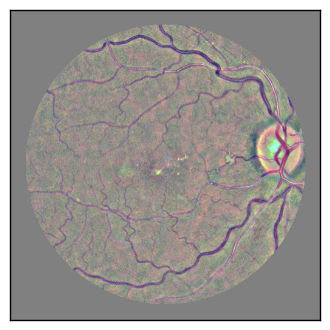

In [44]:
tst =  X_train[5]
print(tst.shape)
tst = np.rollaxis(tst,0,3)
plt.imshow(tst[:,:,::-1])
plt.xticks([]),plt.yticks([])
plt.show()

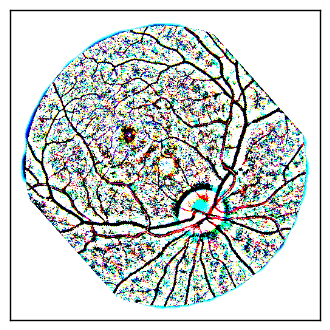

(<matplotlib.image.AxesImage at 0x7f758a57bb10>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 None)

In [45]:
#substract local mean color
r = cv2.addWeighted(x,128, cv2.GaussianBlur(x, (0,0), scale/30), -128,256)

plt.imshow(r ) , plt.xticks([]),plt.yticks([]) , plt.show()


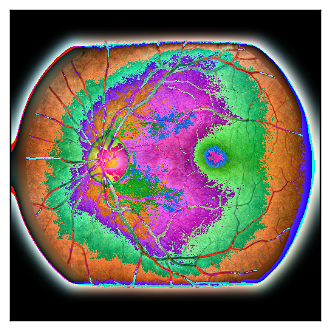

(<matplotlib.image.AxesImage at 0x7f7581210890>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 None)

In [67]:
#Try to recovery the original image making the inverse operation

noise = cv2.GaussianBlur(rez, (0,0), scale/30)
z = (final2 + noise*4 - 128 )/4.
z = (z*(255./63.)).astype('uint8')  
plt.imshow(z ) , plt.xticks([]),plt.yticks([]) , plt.show()


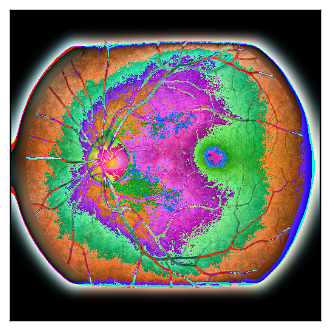

(<matplotlib.image.AxesImage at 0x7f7580cf5dd0>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 None)

In [75]:
noise = cv2.GaussianBlur(rez, (0,0), scale/30)
gg = np.empty([512, 512, 3])
for i in np.arange(0,3):
    gg[:,:,i] = (final2[:,:,i] + noise[:,:,i]*4 - 128 )/4.
gg = (gg*(255./np.max(gg))).astype('uint8')  
plt.imshow(gg ) , plt.xticks([]),plt.yticks([]) , plt.show()


In [76]:
print(np.min(gg))
print(np.max(gg))
z.dtype

0
255


dtype('uint8')

In [62]:
noise.shape

(512, 512, 3)